 <a id='ReturntoTop'></a>
<header>
  <div style="display:flex; align-items:center;">
    <div style="flex-grow:1;">
      <h1>Oregon Wildlife - Image Classification Capstone</h1>
      <h3>Notebook 5 - Transfer Learning</h3>
      <p>Author: David Lappin | Company: BrainStation | Date: 3/1/2023 - 4/11/2023 </p>
    </div>
    <img src="bannerphoto/bannereagle.jpg" alt="your-image-description" style="height:150px; margin-left:20px; border: 4px solid black;border-radius: 5%;">
  </div>
</header>

------------------------------------------------------------------------------------------------------------------------------

# Introduction and Purpose

For our final model we will be exploring transfer learning with pretrained models. Transfer learning allows us to use the training and power of an existing model to perform on our specific task. There are a variety of different and very powerful pretrained models. These models have been developed over years and have been trained on millions of images in some cases. These models have already been trained to recognize a variety of features, and we can use the powerful pattern recognition (already trained) in our dataset. Additional fine tuning of the model can really help to hone in on the detail of our dataset. Effectively, we can build an extrodinarily complex model but still greatly reduce the training time and energy needed.

For this example we will be using MobileNetV2 which is a 157 layer CNN that has been trained on millions of images from the ImageNet dataset. This model is designed with mobile use and limited computational power in mind. This is a slightly smaller model than some others available, but it will allow us to limit the amount training time. Additionally, if we wanted to try and implement our model into a mobile application, this model will provide a lightweight and resource efficient choice.


# Table of Contents

[Packages Import](#1)

[Data Import](#2)

[Prepare Data](#3)

[Create and Compile Transfer Learning Model](#4)

[Fit and Run Model](#5)

[Preliminary Model Evaluation](#6)

[Import Test Data and Make Predictions](#7)

[Fine Tuning the Model](#8)

[Visualize Fine Tuning the Model](#9)

[Import Test Data and Make Predictions with Fine Tuned Model](#10)

[Optional Model Loading](#11)

[Predict on New Data with Fine Tuned Model](#12)

[Experiment With Trail Camera Footage As Use Case Scenario](#13)

[Summary and Next Steps](#14)

 # Packages Import:
 <a id='1'></a>
[Return to Top](#ReturntoTop)

**Matplotlib** - Used as needed for basic visualizations

**Numpy** - Supports large, multi-dimensional arrays and matrices,and contains a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** - Additional data manipulation and analysis

**OS** - interaction with the native OS Python (used for establishing relative path to data files)

**PIL** - Python Imaging Library. Original support for python to deal with images

**glob** - Useful for finding pathname sbased on specific patterns

**sklearn** - machine learning library

**seaborn** - graphing and visualization package

**visualkeras** - allows to visualize CNN model architechture

**Tensorflow** - Machine learning and artificial intelligence with particular focus on training and inference of deep neural networks

**Keras** - Application Program interface (API) built on tensorflow. Used for implementing neural networks (supports backend computation in tensor flow up to 2.3)

     

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL 
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import visualkeras


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Import Data:
 <a id='2'></a>
[Return to Top](#ReturntoTop)

In [2]:
#set local path to files for basic exploration

trainpath = 'data/oregon_wildlife/' # This is the relative path to the data
valpath = 'data/oregon_wildlife_validation/' # This is the relative path to the data
testpath = 'data/oregon_wildlife_test/' # This is the relative path to the data

Ensure Data is still in the same state as we left it from the previous EDA before modeling.

In [6]:
#create and save lists of all file stored in each directory

train_files = os.listdir(trainpath) 
val_files = os.listdir(valpath) 
test_files = os.listdir(testpath) 

In [8]:
#create counts of each class for the training set

totalcount_train = [] #empty list to store counts
class_for_count = [] #empty list to store class names


for file in train_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_train.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in train directory: {sum(totalcount_train)}')

588: bald_eagle
560: black_bear
535: bobcat
558: canada_lynx
580: columbian_black-tailed_deer
518: cougar
581: coyote
608: deer
505: elk
513: gray_fox
575: gray_wolf
420: mountain_beaver
536: nutria
569: raccoon
495: raven
602: red_fox
426: ringtail
540: seals
570: sea_lions
571: virginia_opossum
Total images in train directory: 10850


In [9]:
#create counts of each class for the validation set

totalcount_val = [] #empty list to store counts
class_for_count_val = [] #empty list to store class names

for file in val_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_validation/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_val.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in validation directory: {sum(totalcount_val)}')

135: bald_eagle
135: black_bear
135: bobcat
135: canada_lynx
135: columbian_black-tailed_deer
135: cougar
135: coyote
135: deer
135: elk
135: gray_fox
135: gray_wolf
135: mountain_beaver
135: nutria
135: raccoon
135: raven
135: red_fox
135: ringtail
135: seals
135: sea_lions
135: virginia_opossum
Total images in validation directory: 2700


In [10]:
#create counts of each class for the test set

totalcount_test = [] #empty list to store counts
class_for_count_test = [] #empty list to store class names

for file in test_files:
    
    #uses glob to take the length of the list of all files in the sub directory
    count = len(list(glob(f'data/oregon_wildlife_test/{file}/*')))   
    
    #appends the count to the empty list total count
    totalcount_test.append(count)
    
    #prints the count and the name of the sub-directory
    print(f'{count}: {file}')

#prints the sum total of the list to show the total image count in all sub directories    
print(f'Total images in test directory: {sum(totalcount_test)}')

20: bald_eagle
20: black_bear
20: bobcat
20: canada_lynx
20: columbian_black-tailed_deer
20: cougar
20: coyote
20: deer
20: elk
20: gray_fox
20: gray_wolf
20: mountain_beaver
20: nutria
20: raccoon
20: raven
20: red_fox
20: ringtail
20: seals
20: sea_lions
20: virginia_opossum
Total images in test directory: 400


### Observations: 
Everything looks the same.

# Prepare Data:
 <a id='3'></a>
[Return to Top](#ReturntoTop)

We will use the dimensions (224X224). MobileNetV2 expects image dimensions of 224x224 because these are the same values used in its training on the ImageNet data set. You can reduce the dimensions if you desire with the understanding that it will reduce the detail of the images and impact the performance of the model.

In [11]:
#Set Batch Size
BATCH_SIZE = 32

#set Image Size
IMG_SIZE = (224, 224)

Next, as we have done many times before we will prepare our data with `image_dataset_from_directory` using the data paths defined above.

In [12]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  trainpath, #train data path
  label_mode='int', #encode labels as integers
  seed=7,
  image_size=IMG_SIZE, #dimensions defined above
  batch_size=BATCH_SIZE)


val_set = tf.keras.preprocessing.image_dataset_from_directory(
  valpath,  #validation data path
  label_mode='int',#encode labels as integers
  seed=7,
  image_size=IMG_SIZE, #dimensions defined above
  batch_size=BATCH_SIZE)

Found 10850 files belonging to 20 classes.
Found 2700 files belonging to 20 classes.


**Note** These values match the counts from the directory above. 

# Create and Compile Transfer Learning Model
 <a id='4'></a>
[Return to Top](#ReturntoTop)


We will again be compiling a CNN model and we will be using MobileNetV2 as the base with the weights frozen. We can first set our prefetching parameters to optimze performance.


Below:
- **Autotune** allows for CPU performance optimizaiton
- **Cache** - stores imported images in memory for future epoch iterations
- **prefetch** - allows for overlapping of preprocess and training

In [13]:
#adjust the prefetching for performance

AUTOTUNE = tf.data.AUTOTUNE #Autotune optimizes CPU uptime for each batch

train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) #cache stores data in memory after 1st epoch for faster iterations
val_set = val_set.cache().prefetch(buffer_size=AUTOTUNE) #prefetch allows for overlapping 


Below we will load in the MobileNetV2 model making sure to include the imagenet weights and `include_top` set to false. We do not want to include the top layers because we want the top layers to be out output with the number of classes specified by our dataset (20)

In [14]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, #we do not want the top layers we will define our own output
                                               weights='imagenet') #use imagenet weights



9406464/9406464 [==============================] - 1s 0us/step


Set the trainable to false. We want to freeze all the layers. If we do not do this, we will be retraining the weights of the model on our data and this is not what we want to do.

In [15]:
#Freeze layers and weights

base_model.trainable = False

Ok now we can take a look at our base model and get an idea of what our model looks like:

In [16]:
#look at the model summary

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

### Observations:
As we can see the model is significantly more complicated and developed than the previous models we constructed. We can next define some of our layers that will go into the model and then begin to compile the full model.

In [17]:
#define our data augmentation layer as we did in previous notebooks
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.1) 
])


#Define our "preprocessing input" - this works simliarly to how our rescaling layer worked in previous notebooks
#specifically preprocesses data so the MobileNetV2 will accept the inputs
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


#pooling layer to drop the output of the base model into 
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

#creates the final output layer for our data with a softmax activation and 20 classes
prediction_layer = tf.keras.layers.Dense(20, activation='softmax', name='prediction')


In [18]:
#re-define inputs
inputs = tf.keras.Input(shape=(224, 224, 3))

#augment inputs
x = data_augmentation(inputs)

#preprocess and scale for base model compatibility
x = preprocess_input(x)

#include the basemodel with training set to flase so the layers are not trained
x = base_model(x, training=False)

#pooling layer for the data to be passed to after base model
x = global_average_layer(x)

#drop out layer to reduce overfitting
x = tf.keras.layers.Dropout(0.2)(x)

#final output is our prediction layer
outputs = prediction_layer(x)

#define model by the above selected inputs and outputs
mobV_model = tf.keras.Model(inputs, outputs)


Compile the model using:
- Adam Optimzer (high performing gradient decent method, using a slightly smaller than default learning rate to attempt to converge at a more optimal solution)
 - note there are other options but we will stick with Adam
- SparseCategoricalCrossentropy loss calcualtion  (used when there are more than two classes or labels and the labels are encoded as 'int')

In [19]:
#define learning rate or step size
base_learning_rate = 0.0001

#compile the model
mobV_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We can now take a look at our full compiled model:

In [20]:
#model summary

mobV_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

### Observations

We can see from the summary that the total parameters are rough 2.3 million, but we are only training 25 thousand of them. From this we can be sure that the base model layers are frozen and the trainable layers are only from our pooling/dropout/output prediction layers.

# Fit and Run
 <a id='5'></a>
[Return to Top](#ReturntoTop)

In [21]:
# set stopping criteria

callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.05, patience=5)

In [22]:
#set epochs
epochs = 30

#save history  and fit the model to the train set and validate on the val set, use call backs as defined above
history = mobV_model.fit(   
  train_set,            
  validation_data=val_set, 
  epochs=epochs,
  callbacks = [callbacks]
)

Epoch 1/30


C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


340/340 [==============================] - 214s 543ms/step - loss: 2.4851 - accuracy: 0.2702 - val_loss: 1.6009 - val_accuracy: 0.5893
Epoch 2/30
340/340 [==============================] - 181s 532ms/step - loss: 1.5015 - accuracy: 0.5755 - val_loss: 1.0718 - val_accuracy: 0.7144
Epoch 3/30
340/340 [==============================] - 180s 531ms/step - loss: 1.1637 - accuracy: 0.6647 - val_loss: 0.8696 - val_accuracy: 0.7463
Epoch 4/30
340/340 [==============================] - 184s 541ms/step - loss: 1.0057 - accuracy: 0.6981 - val_loss: 0.7622 - val_accuracy: 0.7644
Epoch 5/30
340/340 [==============================] - 183s 539ms/step - loss: 0.9133 - accuracy: 0.7218 - val_loss: 0.7102 - val_accuracy: 0.7826
Epoch 6/30
340/340 [==============================] - 182s 535ms/step - loss: 0.8463 - accuracy: 0.7381 - val_loss: 0.6709 - val_accuracy: 0.7922
Epoch 7/30
340/340 [==============================] - 181s 534ms/step - loss: 0.8000 - accuracy: 0.7544 - val_loss: 0.6335 - val_accura

#### Observations:

The model stopped (early stopping) at 24/30 epochs. We can now save the model for future loading and begin to visualize and evaluate our baseline model:

Save the model: (note this code is only needed if you plan to save the model weights after running)

In [23]:
#save the model weights for use in predictions later if desired

mobV_model.save('models/MobileNetV2.h5')

# Preliminary Evaluation
 <a id='6'></a>
[Return to Top](#ReturntoTop)

We can visualize the model perfmormance.

##### SOURCE - plot code base from TF Guide:
https://www.tensorflow.org/tutorials/images/classification

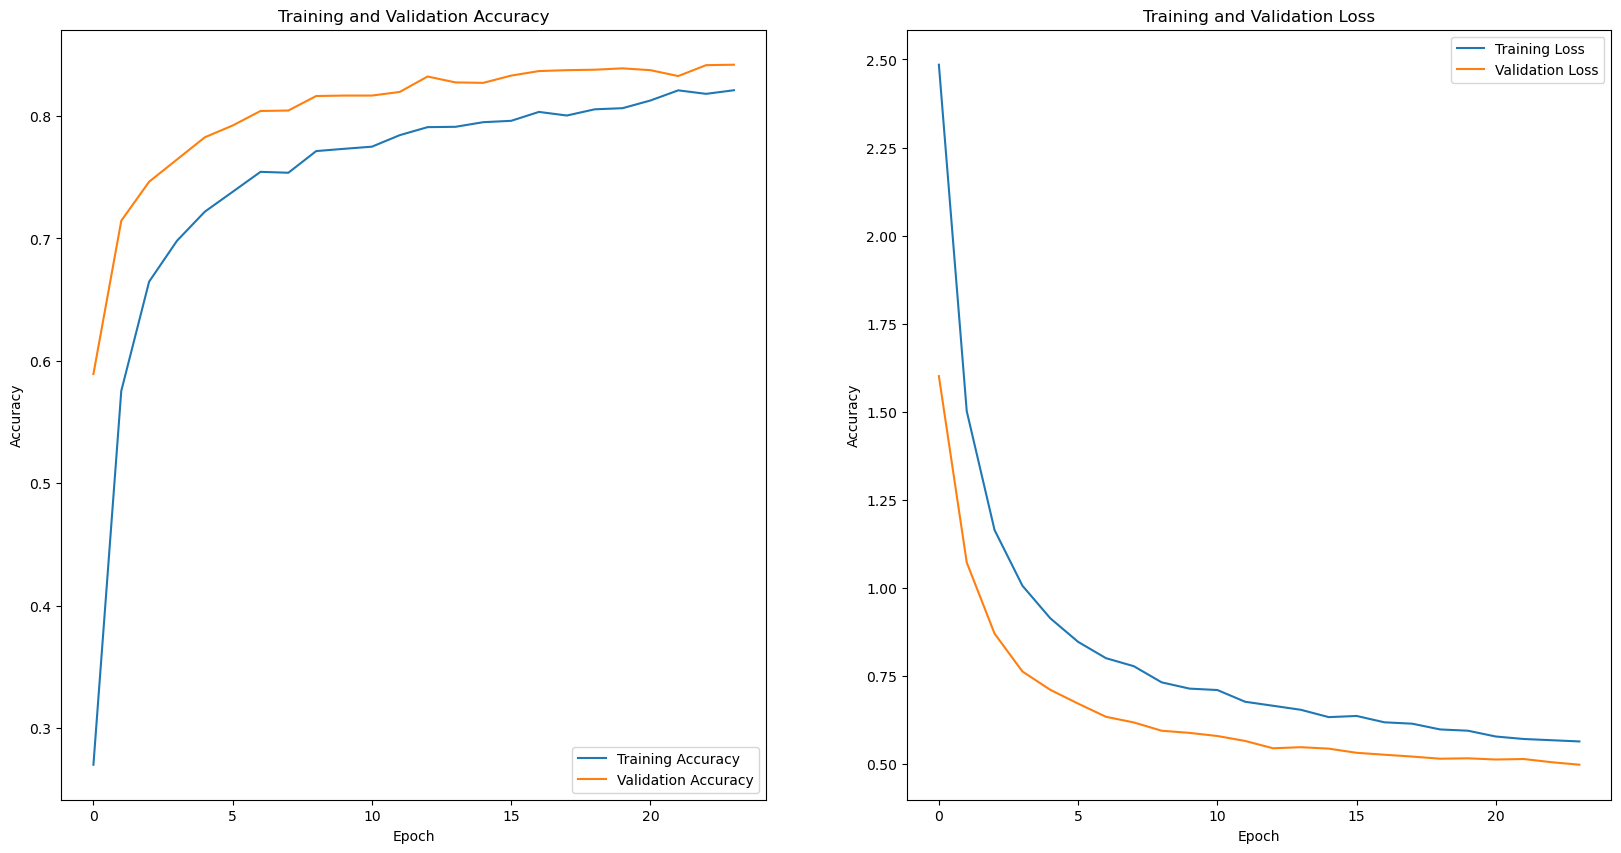

In [24]:
#visualize model performance after 30 

#pull out the accuracy and validation accuracies from model fit history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#pull out the loss data from the model fit history
loss = history.history['loss']
val_loss = history.history['val_loss']

#x lab range defined by the # of epochs ran
epochs_range = range(len(acc))

#training vs Validation Accuracies
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------

#visualize loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
We can really see the power of transfer learning in our first glimpse at the models performance. We were able to achieve a validation accuracy of (84.19%). this is nearly double the accuracy that we were able to achieve when attempting to create our own CNN. We can evaluate further as we have done before to see how each of the classes performed. We can also take a look at the weighted f1-score to compare back to our previous models.

As a note, per TF Guidance:

"If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like tf.keras.layers.BatchNormalization and tf.keras.layers.Dropout affect accuracy during training. They are turned off when calculating validation loss. To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer."

##### SOURCE:
https://www.tensorflow.org/tutorials/images/transfer_learning

# Import Test Data and Make Predictions
 <a id='7'></a>
[Return to Top](#ReturntoTop)

Lets make some predictions and see how our model is performing before fine-tuning it to our data.

In [25]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=IMG_SIZE,
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [26]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels


for x, y in test_set:
  
  #generate predictions 


  #generate true labels
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels

#loop through batch of data and their corresponding labels
for x, y in test_set:
  
  #generate predictions by taking the max value (highest probability) prediction from the model 
  predictions = np.concatenate([predictions, np.argmax(mobV_model.predict(x), axis = -1)]) 

  #generate true labels from the tensor form to numpy array and extract the true class index with argmax
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 1s 663ms/step


In [27]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [28]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [29]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

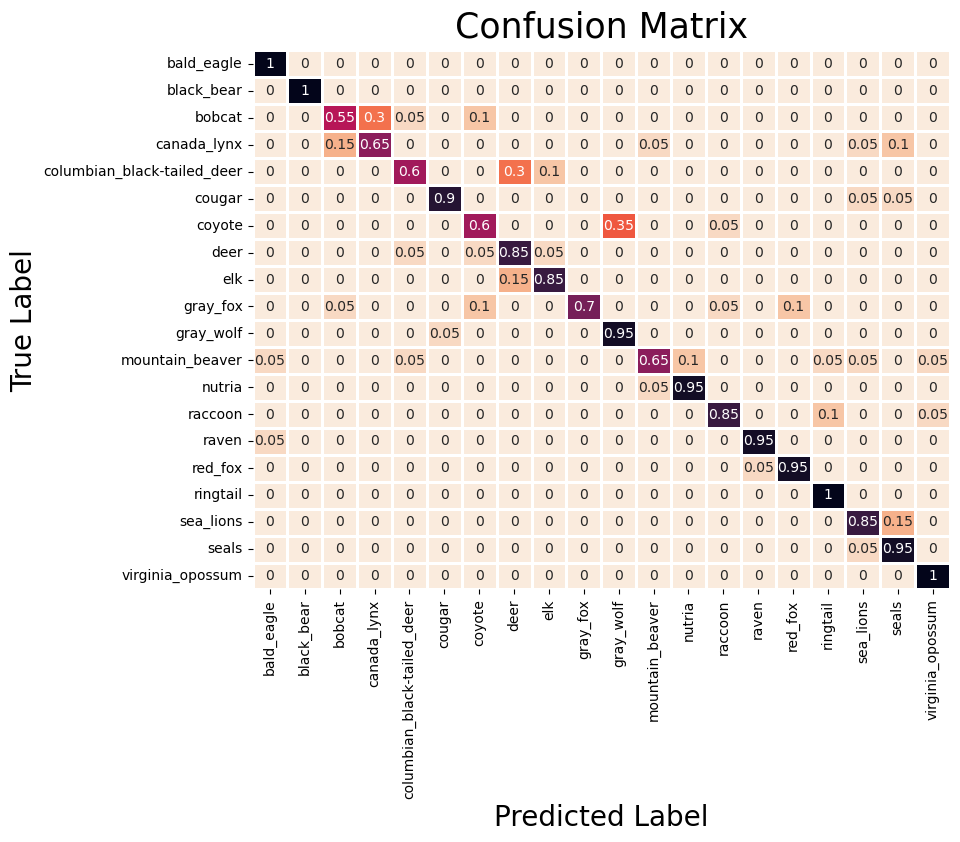

In [30]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations
Once again we can see how powerful the transfer learning model is. Where we once had a few classes perform well we now see that there are only a few classes that are sub-par. But even these classes are predicting extremely well. The few classes that are slightly below the standard of the rest are again, classes that share extremely similar features to other classes. Bobcats and lynxs are nearly identical. The various deer species are also very similar. We can dive in a bit further with our classification report.

In [31]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       0.91      1.00      0.95        20
                 black_bear       1.00      1.00      1.00        20
                     bobcat       0.73      0.55      0.63        20
                canada_lynx       0.68      0.65      0.67        20
columbian_black-tailed_deer       0.80      0.60      0.69        20
                     cougar       0.95      0.90      0.92        20
                     coyote       0.71      0.60      0.65        20
                       deer       0.65      0.85      0.74        20
                        elk       0.85      0.85      0.85        20
                   gray_fox       1.00      0.70      0.82        20
                  gray_wolf       0.73      0.95      0.83        20
            mountain_beaver       0.87      0.65      0.74        20
                     nutria       0.90      0.95      0.93        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [32]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

precision  recall  f1-score  support
bald_eagle                    0.909091    1.00  0.952381    20.00
black_bear                    1.000000    1.00  1.000000    20.00
bobcat                        0.733333    0.55  0.628571    20.00
canada_lynx                   0.684211    0.65  0.666667    20.00
columbian_black-tailed_deer   0.800000    0.60  0.685714    20.00
cougar                        0.947368    0.90  0.923077    20.00
coyote                        0.705882    0.60  0.648649    20.00
deer                          0.653846    0.85  0.739130    20.00
elk                           0.850000    0.85  0.850000    20.00
gray_fox                      1.000000    0.70  0.823529    20.00
gray_wolf                     0.730769    0.95  0.826087    20.00
mountain_beaver               0.866667    0.65  0.742857    20.00
nutria                        0.904762    0.95  0.926829    20.00
raccoon                       0.894737    0.85  0.871795    20.00
raven                         0.950000    0.95  0.950000    20.00
red_fox                       0.904762    0.95  0.926829    20.00
ringtail                      0.869565    1.00  0.930233    20.00
sea_lions                     0.809524    0.85  0.829268    20.00
seals                         0.760000    0.95  0.844444    20.00
virginia_opossum              0.909091    1.00  0.952381    20.00
accuracy                      0.840000    0.84  0.840000     0.84
macro avg                     0.844180    0.84  0.835922   400.00
weighted avg                  0.844180    0.84  0.835922   400.00

### Observations
We can see that the weighted f1-score is now 0.835, which again is nearly double the value of our previous model. Additionally, as the confusion matrix alluded to, the performance across all classes is relatively even.

In [33]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

precision  recall  f1-score  support
black_bear         1.000000    1.00  1.000000     20.0
bald_eagle         0.909091    1.00  0.952381     20.0
virginia_opossum   0.909091    1.00  0.952381     20.0
raven              0.950000    0.95  0.950000     20.0
ringtail           0.869565    1.00  0.930233     20.0

In [34]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

precision  recall  f1-score  support
deer                          0.653846    0.85  0.739130     20.0
columbian_black-tailed_deer   0.800000    0.60  0.685714     20.0
canada_lynx                   0.684211    0.65  0.666667     20.0
coyote                        0.705882    0.60  0.648649     20.0
bobcat                        0.733333    0.55  0.628571     20.0

### Observations

The worst performing classes were bobcats, coyote, and lynx which, as we stated prior, all share very similar features. Both species of deer are also present at the bottom of the list. We can next move on to fine tuning the model to make some additional improvements.

# Fine-Tuning the Model
 <a id='8'></a>
[Return to Top](#ReturntoTop)

We can fine tune the model to perform even better on our specific data set by unfreezing some of the top layer (those closest to the output) and re-training the weights on out dataset. Typically in CNNs the bottom layers (closer to the inputs) are more generalized and pick up on features that are more transferable to other datasets. We don't want to touch these layers, but instead we want to re-train some of the layers closer to the output. These layers are typically much more specified to the data-set, so by re-training them we may be able to increase the performance of the model even further. 

We will start by changing the base layer to allow it to be trained:

In [35]:
#switch from false to true to allow training

base_model.trainable = True

We can next determine how many of the top layers we want to fine tune. Lets try around 15% of the total layers in the base model. We can start by determining the total layers.

In [36]:
# Let's take a look to see how many layers are in the base model

print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  154


15% of 154 is roughly 21 layers. So lets allow training for the last 21 layers by freezing all layers prior to 134 (154 total layers - 21 layers)

In [37]:
# Fine-tune from this layer onwards (roughly 15% of the base model to finetune the top layers prior to the classification head)
fine_tune_at = 134

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False


We will again compile the model except this time we are going to decrease the learning rate so that the model will not make dramatic shifts in the pre-existing weights. We want to further train these layers, but we do not want to completely start over. 

In [38]:
#define learning rate or step size
base_learning_rate = 0.0001

#compile the model
mobV_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
#look at the model summary

mobV_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

### Observations:
Notice that the number of trainable parameters is now much higher than previously. This indicates that we have successfully unfrozen some but not all of the layers in the model. We can also confirm the number of trainable layer to confirm it matches our expected by calling `.trainable_variables` on the newly compiled model.

In [40]:
len(mobV_model.trainable_variables)

23

23 layers makes sense here because we unfroze the final 21 layers of the base model, and in addition we have our global pooling layer and output prediction layer.

In [41]:
#new fine tuned epochs
fine_tune_epochs = 20

#prior epochs completed
prior_epochs = 24

total_epochs =  prior_epochs + fine_tune_epochs #total new number of epochs

history_fine = mobV_model.fit(train_set, #fit on the train set
                         epochs=total_epochs, #the total is the sum of the fine tuned epochs and the previously completed epochs
                         initial_epoch=history.epoch[-1], #starts the epochs at the last completed epoch
                         validation_data=val_set, #validate on the val set
                         callbacks = [callbacks]) #include early stopping to limit overfitting


Epoch 24/44


C:\Users\dlapp\anaconda3\envs\baseclone\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


340/340 [==============================] - 204s 587ms/step - loss: 0.5450 - accuracy: 0.8190 - val_loss: 0.4798 - val_accuracy: 0.8459
Epoch 25/44
340/340 [==============================] - 198s 583ms/step - loss: 0.5091 - accuracy: 0.8314 - val_loss: 0.4704 - val_accuracy: 0.8496
Epoch 26/44
340/340 [==============================] - 199s 587ms/step - loss: 0.4956 - accuracy: 0.8353 - val_loss: 0.4552 - val_accuracy: 0.8522
Epoch 27/44
340/340 [==============================] - 197s 580ms/step - loss: 0.4666 - accuracy: 0.8452 - val_loss: 0.4503 - val_accuracy: 0.8559
Epoch 28/44
340/340 [==============================] - 198s 582ms/step - loss: 0.4473 - accuracy: 0.8505 - val_loss: 0.4606 - val_accuracy: 0.8489
Epoch 29/44
340/340 [==============================] - 196s 578ms/step - loss: 0.4265 - accuracy: 0.8589 - val_loss: 0.4525 - val_accuracy: 0.8541
Epoch 30/44
340/340 [==============================] - 199s 585ms/step - loss: 0.4154 - accuracy: 0.8642 - val_loss: 0.4278 - val_

### Observations:

The model completed all epochs but seems to be moving toward overfitting if traing were ton continue. We can now save the model for future loading and begin to visualize and evaluate our baseline model:

In [42]:
#save the model weights for use in predictions later if desired

mobV_model.save('models/MobileNetV2_finetuned.h5')

# Visualize Fine Tuning Model
 <a id='9'></a>
[Return to Top](#ReturntoTop)

In [43]:
#add the new fine tuned accuracy history to the previous models accuracy history 
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

#add the new fine tuned loss history to the previous models loss history 
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


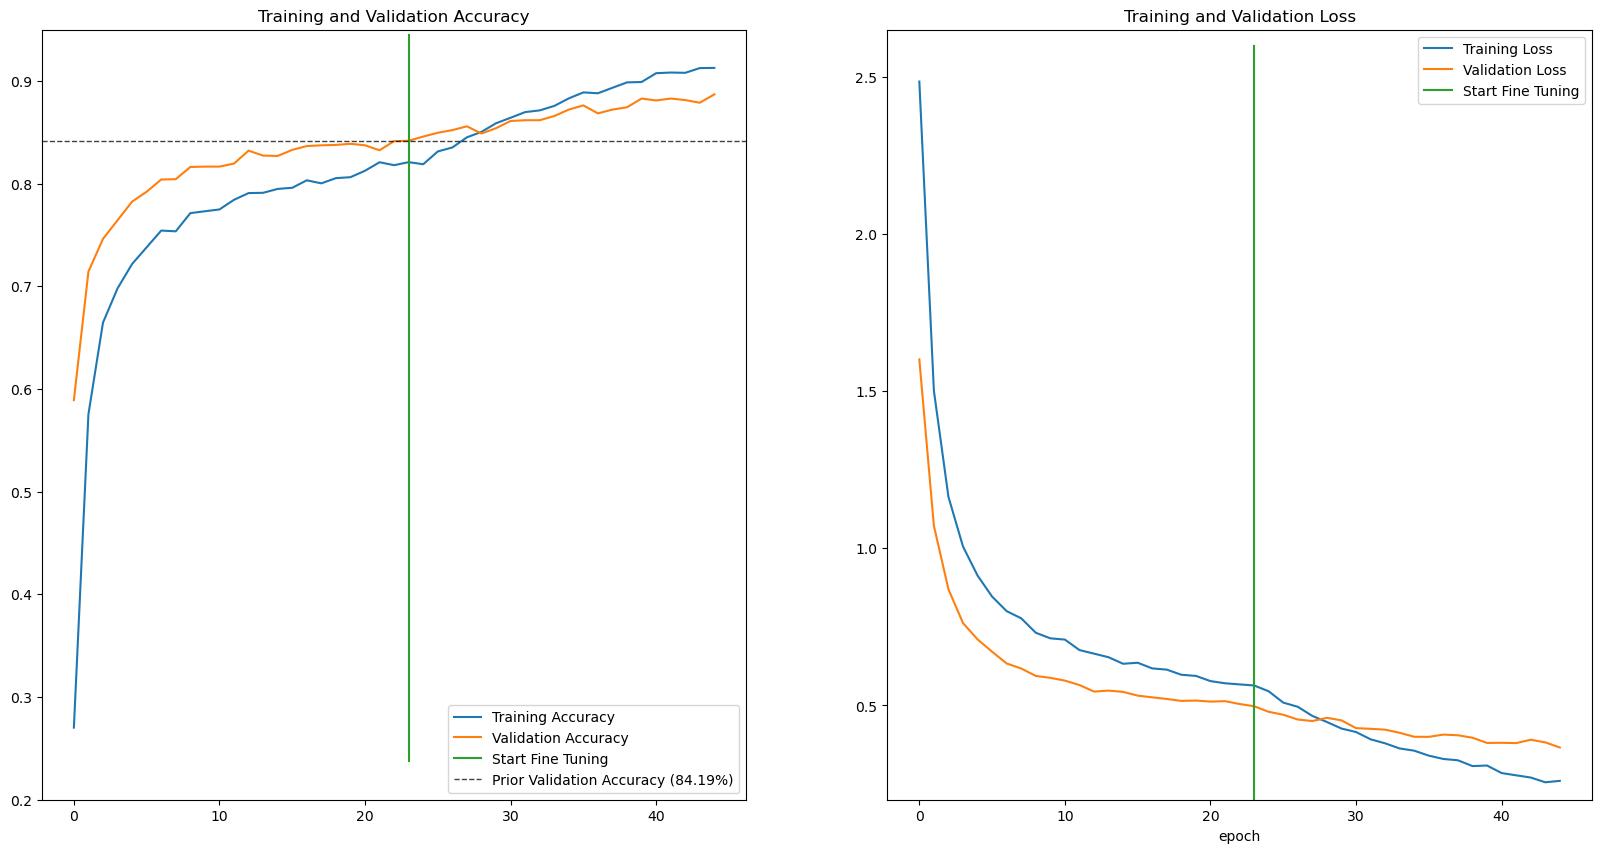

In [46]:
#Set figure size
plt.figure(figsize=(20, 10))

#Set subplot location 
plt.subplot(1, 2, 1)

#Plot the new data and the old data together
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

#add v line for where the fine tuning started
plt.plot([prior_epochs-1, prior_epochs-1], plt.ylim(), label='Start Fine Tuning')

#Add h line to show previous max validation accuracy 
plt.axhline(0.8419, color = "black", linestyle = '--', linewidth = 1, alpha = 0.75, label = 'Prior Validation Accuracy (84.19%)')

#legend titles and labels
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0.2, 0.95])

#----------------------------------------------------------------------

#set subplot location
plt.subplot(1, 2, 2)

#plot combined losses
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

#add v line for where the fine tuning started
plt.plot([prior_epochs-1, prior_epochs-1], plt.ylim(), label='Start Fine Tuning')

#legend titles and labels
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylim([0.2, 2.65])

plt.show()


### Observations:
We can see than we were able to increase our validation accuracy from 84% to 88% by finetuning the model. The validataion and training accuraccies crossed over as we unfroze some of the layers to allow for training. While the training completed all of the epochs, there would have been a risk of overfitting if we had continued. The training accuracies would have continued to increase but the validation would have dropped off. In any case, this is a good start and we were able to squeeze out a but more performance in our model. Lets evaluate further.

# Import Test Data and Make Predictions on Fine Tuned Model
 <a id='10'></a>
[Return to Top](#ReturntoTop)

In [47]:
#import test set directory for predictions

test_set = tf.keras.preprocessing.image_dataset_from_directory(
  testpath,
  image_size=IMG_SIZE,
  label_mode = 'categorical') #since these are not for training we can load as categorical rather than integer

Found 400 files belonging to 20 classes.


#### SOURCE

Found way to extract multiple predictions across whole dataset from answer by (Frightera, 2021)
https://stackoverflow.com/questions/68121629/trying-to-extract-y-val-from-dataset-throws-all-the-input-arrays-must-have-same

In [48]:
#generate predictions on test data

predictions = np.array([]) #empty list for predictions
labels =  np.array([]) #empty list for labels


for x, y in test_set:
  
  #generate predictions 
  predictions = np.concatenate([predictions, np.argmax(mobV_model.predict(x), axis = -1)]) 

  #generate true labels
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 1s 676ms/step


In [49]:
# generate a tensorflow confusion matrix from the predictions and true labels above

con_mat = tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

In [50]:
#normalize the values such that they fit on a 0-1 scale
normalized_conf_mat = con_mat / con_mat.sum(axis=1)

In [51]:
#define the class names and create temp dataframe to that we can plot using the class names (instead of integers)

class_names = test_set.class_names
con_mat_df = pd.DataFrame(normalized_conf_mat, index=class_names, columns=class_names)

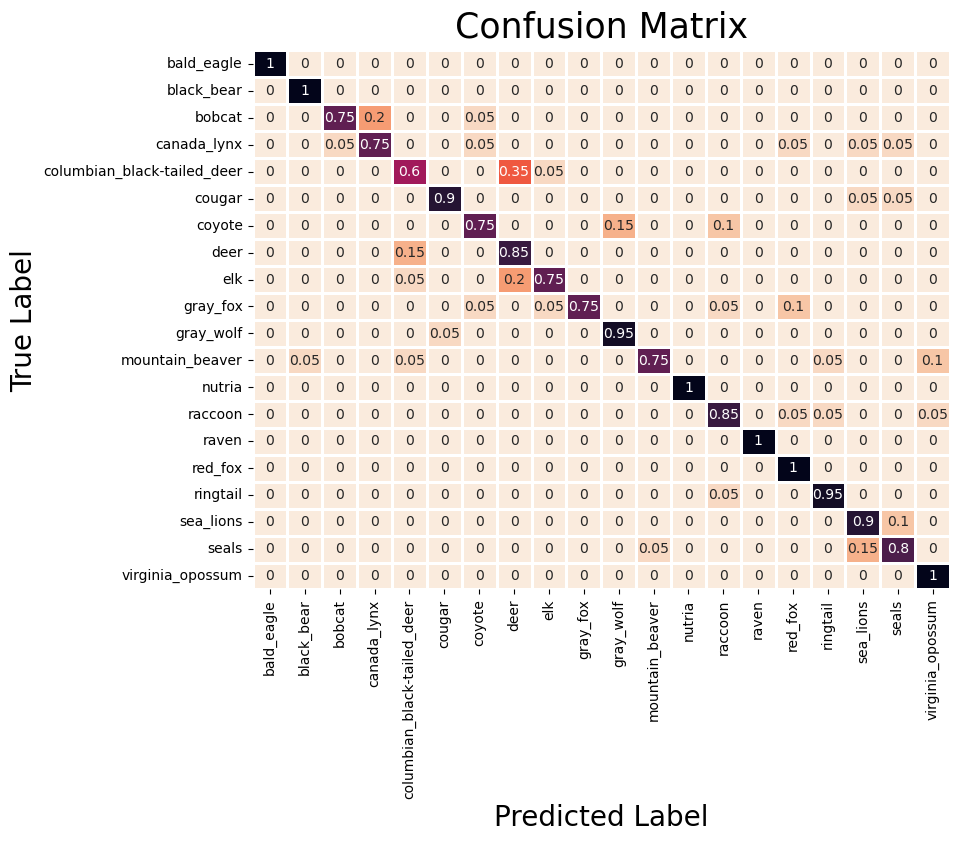

In [52]:
#plot confusion matrix using the data frame with class names created above
plt.figure(figsize = (9,7))
sns.heatmap(con_mat_df,
            annot=True,
            cbar=False,
            cmap="rocket_r",
            linewidths=1
           )
plt.title('Confusion Matrix',size = 25,y=1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

### Observations
The model is still performing very well at a class level with some noteable performance boost in the previously struggling classes. The two species of deer are still misclassifying, but to a lesser extent then the model wihtout the fine-tuning. Bob cats and lynx both saw a considerable boost as well. Lets look at the f1-scores to quatify some of these changes.

In [53]:
#generate classification report from predictions

target_names = test_set.class_names
print(classification_report(labels, predictions, target_names = target_names))

                             precision    recall  f1-score   support

                 bald_eagle       1.00      1.00      1.00        20
                 black_bear       0.95      1.00      0.98        20
                     bobcat       0.94      0.75      0.83        20
                canada_lynx       0.79      0.75      0.77        20
columbian_black-tailed_deer       0.71      0.60      0.65        20
                     cougar       0.95      0.90      0.92        20
                     coyote       0.83      0.75      0.79        20
                       deer       0.61      0.85      0.71        20
                        elk       0.88      0.75      0.81        20
                   gray_fox       1.00      0.75      0.86        20
                  gray_wolf       0.86      0.95      0.90        20
            mountain_beaver       0.94      0.75      0.83        20
                     nutria       1.00      1.00      1.00        20
                    raccoon      

To sort and look closer at the data we can translate the above information into a pandas dataframe so we can sort/agg/visualize the data easier if desired.

##### SOURCE - classification report to pandas df:

https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

In [54]:
#translate the classification report into pd df

classification_report_report = classification_report(labels, predictions, target_names = target_names, output_dict = True)
classification_report_df = pd.DataFrame(classification_report_report).transpose()
classification_report_df

precision  recall  f1-score  support
bald_eagle                    1.000000   1.000  1.000000   20.000
black_bear                    0.952381   1.000  0.975610   20.000
bobcat                        0.937500   0.750  0.833333   20.000
canada_lynx                   0.789474   0.750  0.769231   20.000
columbian_black-tailed_deer   0.705882   0.600  0.648649   20.000
cougar                        0.947368   0.900  0.923077   20.000
coyote                        0.833333   0.750  0.789474   20.000
deer                          0.607143   0.850  0.708333   20.000
elk                           0.882353   0.750  0.810811   20.000
gray_fox                      1.000000   0.750  0.857143   20.000
gray_wolf                     0.863636   0.950  0.904762   20.000
mountain_beaver               0.937500   0.750  0.833333   20.000
nutria                        1.000000   1.000  1.000000   20.000
raccoon                       0.809524   0.850  0.829268   20.000
raven                         1.000000   1.000  1.000000   20.000
red_fox                       0.833333   1.000  0.909091   20.000
ringtail                      0.904762   0.950  0.926829   20.000
sea_lions                     0.782609   0.900  0.837209   20.000
seals                         0.800000   0.800  0.800000   20.000
virginia_opossum              0.869565   1.000  0.930233   20.000
accuracy                      0.865000   0.865  0.865000    0.865
macro avg                     0.872818   0.865  0.864319  400.000
weighted avg                  0.872818   0.865  0.864319  400.000

### Observations
Our over all weighted average f1-score has increased from 0.835 to 0.864. This is definately and improved model.

In [55]:
#best f1 scores

classification_report_df.sort_values('f1-score', ascending = False).head(5)

precision  recall  f1-score  support
bald_eagle         1.000000     1.0  1.000000     20.0
raven              1.000000     1.0  1.000000     20.0
nutria             1.000000     1.0  1.000000     20.0
black_bear         0.952381     1.0  0.975610     20.0
virginia_opossum   0.869565     1.0  0.930233     20.0

In [56]:
#worst f1 scores

classification_report_df.sort_values('f1-score', ascending = False).tail(5)

precision  recall  f1-score  support
seals                         0.800000    0.80  0.800000     20.0
coyote                        0.833333    0.75  0.789474     20.0
canada_lynx                   0.789474    0.75  0.769231     20.0
deer                          0.607143    0.85  0.708333     20.0
columbian_black-tailed_deer   0.705882    0.60  0.648649     20.0

We can also see that, whilespecies such as the lynx still occupy the bottom of the list of f1-scores, they have improved slightly from the previous model. Lynx improved from an f1 score of 0.66 to a new f1-score of 0.76.

# Optional Load for Future Model Predictions:
 <a id='11'></a>
[Return to Top](#ReturntoTop)

If desired in the future, the code below can be used as an example for loading the model to predict on new data or to continue training. The '.h5' file extension saves the model construction, the trained weights, and time information from `compile()`.

##### SOURCE
https://www.tensorflow.org/guide/keras/save_and_serialize

In [57]:
#optional code to re-load and predict on new data

load_model = keras.models.load_model("models/MobileNetV2_finetuned.h5") 


# Test on New Data With Fine Tuned Model:
 <a id='12'></a>
[Return to Top](#ReturntoTop)


Lets re-define our prediction model from the previous notebook:

In [58]:
def predict_class(img_path, model):
    
    """
    This function will take in a defined image path as well as the name of the loaded model and then 
    it will show that image, predict on it, and print the prediction
    """
    
    # Define the image size expected by the model
    img_height, img_width = model.input_shape[1:3]

    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))

    # Show the image
    plt.imshow(img)
    plt.show()

    # Convert the image to an array and create a batch
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction on the image
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Get the predicted class label and confidence
    class_names = ['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 
                   'coyote', 'deer', 'elk', 'gray_fox', 'gray_wolf', 'mountain_beaver', 'nutria', 'raccoon', 'raven', 
                   'red_fox', 'ringtail', 'sea_lions', 'seals', 'virginia_opossum']

    pred_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    # Print the predicted class label and confidence
    print("This image most likely belongs to {} with a {:.2f}% confidence."
          .format(pred_class, confidence))

In [68]:
#Set some image paths 

eagle1 = "randphotos/eagle/mleagle1.jpg"
seal1 = "randphotos/seal/alseal1.JPEG"
deer1 = "randphotos/deer/daldeer1.jpg"
rac1 = 'randphotos/raccoon/alracc1.JPG'

In [69]:
#create a list of the image path variables defined above
function_test_list = [eagle1, seal1, deer1, rac1]

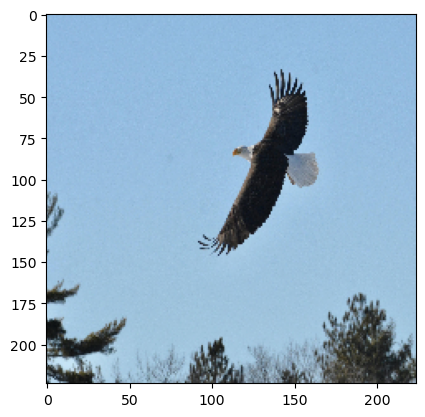

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to bald_eagle with a 12.52% confidence.


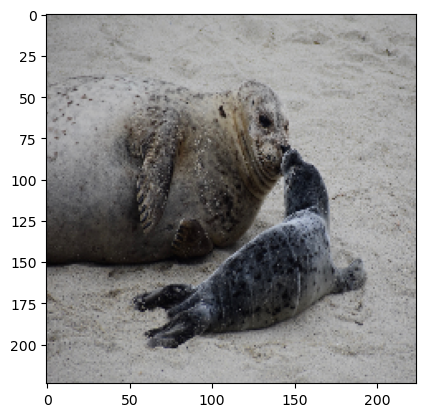

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to seals with a 12.47% confidence.


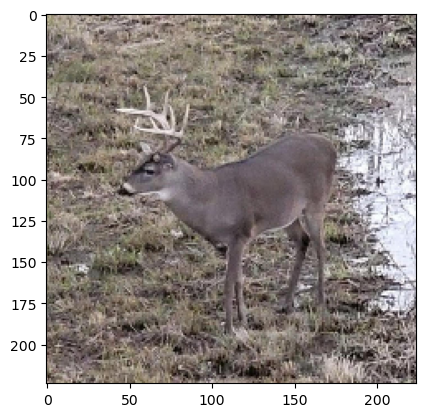

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to deer with a 10.31% confidence.


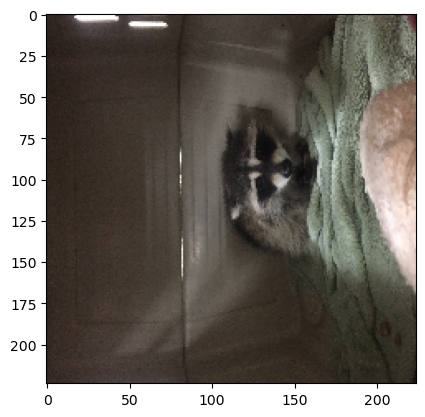

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to raccoon with a 11.98% confidence.


In [70]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

### Observations:
4/4! Impressive. We could continue to play around with different images, but instead lets breifly look at a use case for this model to show how we could expand on this project in the future.


# Trail Cam Use Case:
 <a id='13'></a>
[Return to Top](#ReturntoTop)

What about photos that are slightly different from our training set. What if we wanted to expand the use of this model to predict deer/bears in trail cam photos? My friend was kind enough to provide me with a few hundred trail cam photos of deer and bears on his farm. 

These photos pose an interesting challenge because many of them are taken at night, and all of them are taken around a feeder. If we were to have trained on these photos, it is possible that the model would recognize the feeder, or maybe even the photo id banner at the bottom and it would associate thhose features with a deer. But, since we did not train on these photos, will the model be able to predict them as deer or bears, even if it is at night? Lets test on just a few photos for now and see how it does...

In [130]:
#Set some image paths 

bear1 = "randphotos/bear/MUD_0300.JPG"
bear2 = "randphotos/bear/MUD_0123.JPG"
bear3 = "randphotos/bear/MUD_0143.JPG"
bear4 = "randphotos/bear/MUD_0294.JPG"
deer1 = "randphotos/Trail_cam_deer/Deer/01050080.JPG"
deer2 = "randphotos/Trail_cam_deer/Deer/MTC_0194.JPG"
deer3 = "randphotos/Trail_cam_deer/Deer/01060015.JPG"
deer4 = "randphotos/deer/cardeer1.jpg"

In [131]:
#create a list of the image path variables defined above
function_test_list = [bear1, bear2, bear3, bear4, deer1, deer2, deer3, deer4]

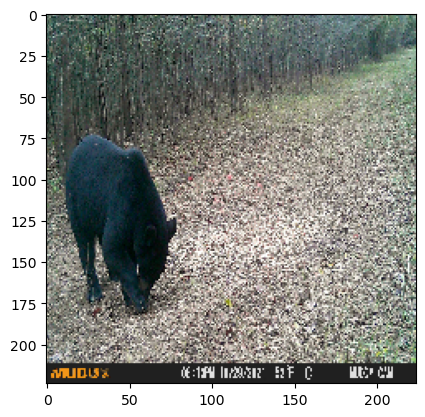

1/1 [==============================] - 0s 33ms/step
This image most likely belongs to black_bear with a 12.44% confidence.


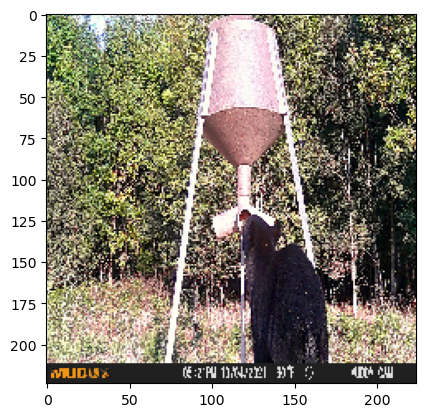

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to black_bear with a 11.98% confidence.


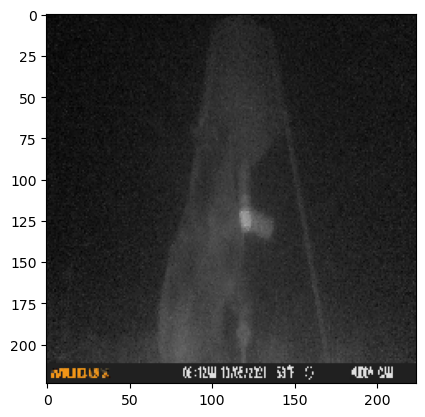

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to raven with a 11.46% confidence.


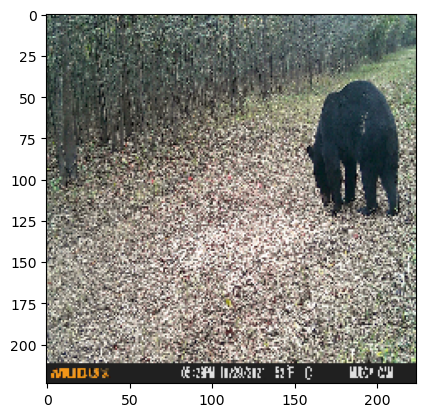

1/1 [==============================] - 0s 32ms/step
This image most likely belongs to black_bear with a 12.32% confidence.


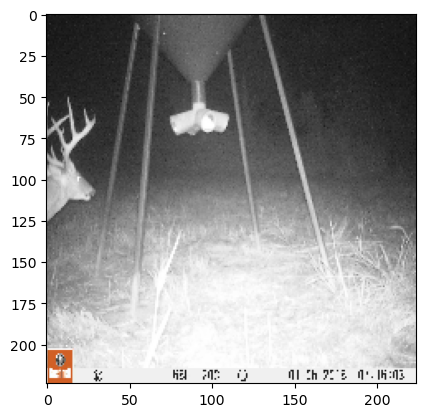

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to columbian_black-tailed_deer with a 7.17% confidence.


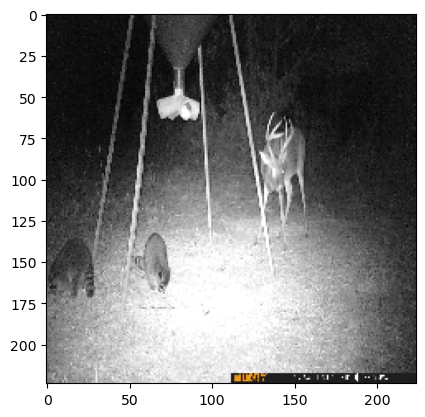

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to columbian_black-tailed_deer with a 6.51% confidence.


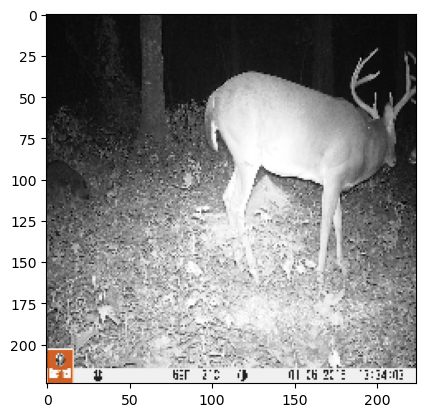

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to deer with a 7.24% confidence.


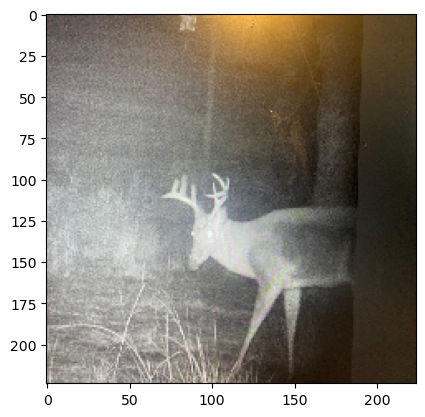

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to deer with a 12.50% confidence.


In [132]:
#loop through each variable in the list
for x in function_test_list:
    
    #use function to show image and prediction
    predict_class(x, load_model)

### Observations

The model, despite being exposed to very limited amounts of trail camera footage, was still able to extract the features of the deer and bears from nearly all the examples and correctly predict them (Note: For this example we are classifying both columbian black tailed deer and deer as the same). This is very cool and will allow us to continue working on this as a potential use case in the future.

# Summary and Next Steps:
<a id='14'></a>
[Return to Top](#ReturntoTop)

**For our transfer learning model we completed these tasks and determined the following:**
- Created a new model and implemented transfer learning with the MobileNetV2 as the base layer
- Evaluated the models performance and determined the following:
    - The over-all accuracy and weighted f1-score nearly doubled fro our previous best model 
- Refined our model by fine tuning some of the top layers and increased the accuracy by roughly 5% and the f1-score by roughly 0.05    
- Predicted on some test data and some unseen data and found that the model was correctly predicting classes more reliably
- Predicted on some trail camera footage of bear and deer and found that the model was generalizing well to new types of data as well

**Next Steps**

- Going foward we could continue to work on fine-tuning the model and or experimenting with other pretrained models. 
- Additionally we could include and set focus to generating reliable predictions on trail cam footage
- We could also work on application implementation to try and build out a working user interface

#### Optional Notebook for Loading In Models and Predicting on New Images - '6.0_Prediction_Playground'

------------------------------------------------------------------------------------------------------------------------------